<a href="https://colab.research.google.com/github/jeonuenseo/eunseo/blob/master/10_2_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

In [17]:
tf.__version__

'2.2.0'

In [18]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [0],
          [0],
          [1]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [19]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [20]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [21]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [22]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [23]:
sess = tf.Session()

In [24]:
sess.run(tf.global_variables_initializer())

In [25]:
vcost =[]

In [26]:
for step in range(10001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        
        print(cost1)

0.7665403
0.5093338
0.3870824
0.31611356
0.26923898
0.23542435
0.20956844
0.18899801
0.17216198
0.15808725
0.14612468


Text(0.5, 0, 'epoch')

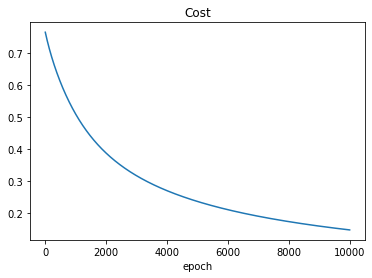

In [27]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [28]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [29]:
print(test1[0][0])

0.011959554


In [30]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})